In [4]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import seaborn as sns

def hist(vals,bins,linestyle='-',label='',color=None):
    a,b= np.histogram(vals,bins)
    bin_centers = 0.5*(b[1:]+b[:-1])
    plt.plot(bin_centers,a/np.sum(a),linestyle=linestyle,label=label,color=color,alpha=1)

In [5]:
datas=pd.read_csv('results/neighbours_data.csv.gz')
linears=pd.read_csv('results/neighbours_gen.csv.gz')

cell_types=np.array(['++', 'CD8+', 'Treg', 'Tconv'] )
names_data=['DP','CD8+','Tconv','Treg']

data_nn=[]
linear_nn=[]
for cell in names_data:
    data_nn.append(datas.loc[datas.cell_type==cell])
    linear_nn.append(linears.loc[linears.cell_type==cell])
linear_nn.append(linears.loc[linears.cell_type=='gen'])

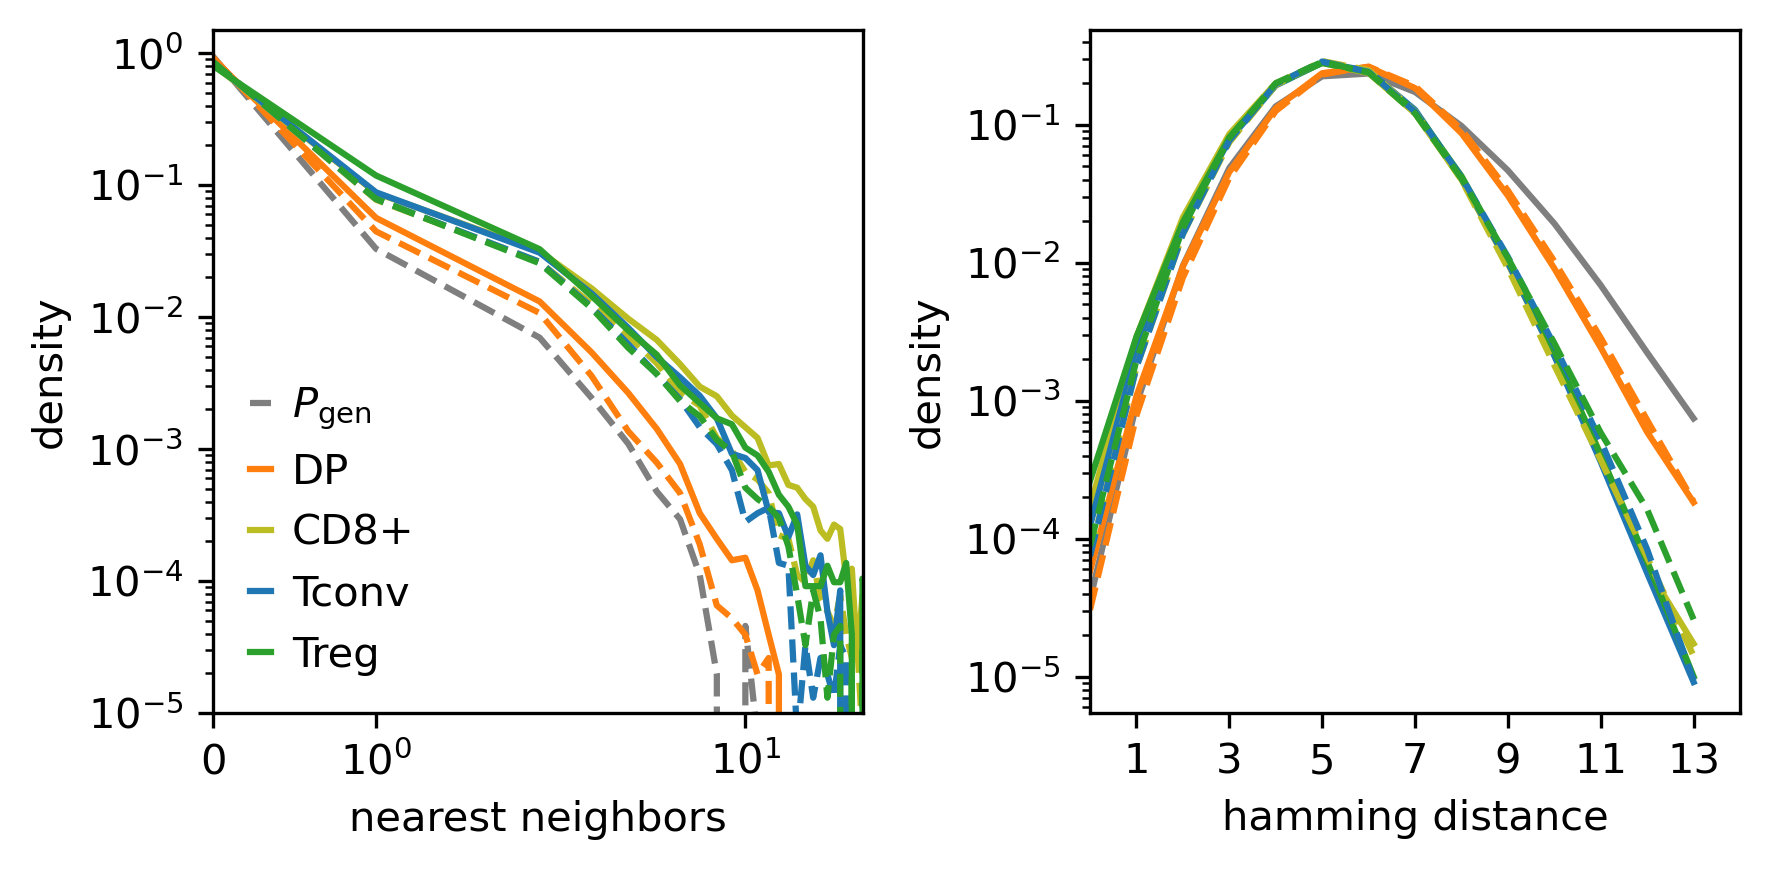

In [6]:
names_data=['DP','CD8+','Tconv','Treg']
names=[r'$P_{\rm gen}$','DP','CD8+','Tconv','Treg']
palette=sns.color_palette()
colors=[palette[i] for i in [7,1,8,2,0]]
names_dict={'++':'DP', 'CD8+':'CD8+', 'Tconv':'Tconv', 'Treg':'Treg', 'gen':r'$P_{\rm gen}$'}
order={'gen':0,'++':1,'CD8+':2,'Tconv':3,'Treg':4}

fig,ax=plt.subplots(figsize=(6,3),dpi=300)
plt.rcParams['lines.linewidth']=1.5
plt.subplot(121)
hist(linear_nn[-1].nn1.values,np.arange(50)-0.5,'--',color=colors[0],label=r'$P_{\rm gen}$')
for i in range(len(data_nn)):
    name=cell_types[i]
    color=order[name]
    hist(data_nn[i].nn1.values,np.arange(50)-0.5,color=colors[color],label=names_data[i])
    hist(linear_nn[i].nn1.values,np.arange(50)-0.5,'--',color=colors[color])

plt.yscale('log')
plt.xscale('symlog')
plt.xlabel(r'nearest neighbors',fontsize=10)
plt.ylabel('density',fontsize=10)
plt.ylim([1e-5,1.5])
plt.xlim([0,25])
plt.legend(frameon=False,handlelength=0.5,handletextpad=0.5)

plt.subplot(122)
d=np.array([d for d in linear_nn[-1].dist_hist])
d_=[]
for a in d:
    s=np.array(a[1:-1].split(' '))
    d_.append(s[s!=''].astype(int))
d=np.array(d_).mean(axis=0)-[1,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.plot( d/np.sum(d),'-',color=colors[0],label=r'$P_{\rm gen}$',alpha=1)

for i in range(len(data_nn)):
    name=cell_types[i]
    color=order[name]

    d=np.array([d for d in data_nn[i].dist_hist])
    d_=[]
    for a in d:
        s=np.array(a[1:-1].split(' '))
        d_.append(s[s!=''].astype(int))
    d=np.array(d_).mean(axis=0)-[1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    plt.plot( d/np.sum(d),color=colors[color],label=names_data[i],alpha=1)

for i in range(len(data_nn)):
    name=cell_types[i]
    color=order[name]

    d=np.array([d for d in linear_nn[i].dist_hist])
    d_=[]
    for a in d:
        s=np.array(a[1:-1].split(' '))
        d_.append(s[s!=''].astype(int))
    d=np.array(d_).mean(axis=0)-[1,0,0,0,0,0,0,0,0,0,0,0,0,0]
    plt.plot( d/np.sum(d),'--',color=colors[color])

plt.xlim([0,14])
plt.yscale('log')
plt.xticks([1,3,5,7,9,11,13],[1,3,5,7,9,11,13])
plt.ylabel(r'density',fontsize=10)
plt.xlabel(r'hamming distance',fontsize=10)
plt.tight_layout()
plt.show()